### Домашнее задание <a class="anchor" id="hw"></a><center>

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

**1. Подберите скорость обучения (eta) и количество итераций**

Можно было пойти двумя путями:

*1. Перебирать в цикле скорости обучения и количество итераций*

In [6]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  5],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [7]:
n = X.shape[0]

etas = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]
n_iters = [10, 100, 250, 500, 800, 1000]

best_error = np.inf
best_params = {}


for eta in etas:
    for n_iter in n_iters:
        W = np.array([1, 0.5])
        curr_eta = eta
        
        for i in range(n_iter):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            for k in range(W.shape[0]):
                W[k] -= curr_eta * (1/n * 2 * X[:, k] @ (y_pred - y))
            if i % 10 == 0:
                curr_eta /= 1.1
#                 print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
                
        if err < best_error:
            best_error = err
            best_params = {
                'eta': eta,
                'n_iter': n_iter
            }
print(f'Лучшая ошибка {best_error} с параметрами {best_params}')

Лучшая ошибка 43.96875547475652 с параметрами {'eta': 0.1, 'n_iter': 1000}


*2. Перебирать вручную*

In [8]:
n = X.shape[0]

eta = 0.1
n_iter = 500

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
#         print(eta)
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266852e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815946e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500115e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.35148012647598e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283862e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.1255335378744607e+19
Iteration #90: W_new = [116395.49982335 641638.79865344], MSE = 31317286806394.33
Iteration #100: W_new = [48.41962396 22.99884644], MSE = 53518.86
Iteration #110: W_new = [44.97713118  3.82798

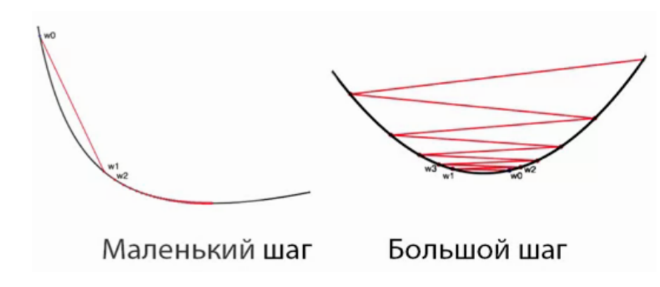

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [9]:
(X.T).shape, len(y)

((2, 10), 10)

In [10]:
n = X.shape[0]

eta = 1e-2
n_iter = 700

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))

    # ИЗМЕНЕНИЯ
#     print(X.shape, (y_pred - y).shape)
#     print(W.shape)
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    #
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98


**3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.**

L1, L2

In [11]:
weights0 = np.array([1, 0.5])
weights1 = np.array([5, 1.9])
np.linalg.norm(weights0 - weights1, ord=2)

4.237924020083418

In [12]:
import matplotlib.pyplot as plt

def plot_vectors(a, b):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot([a[0]], [a[1]], '*')
    ax.plot([b[0]], [b[1]], '+')
    ax.set_xlabel('intercept')
    ax.set_ylabel('w1')
    return ax

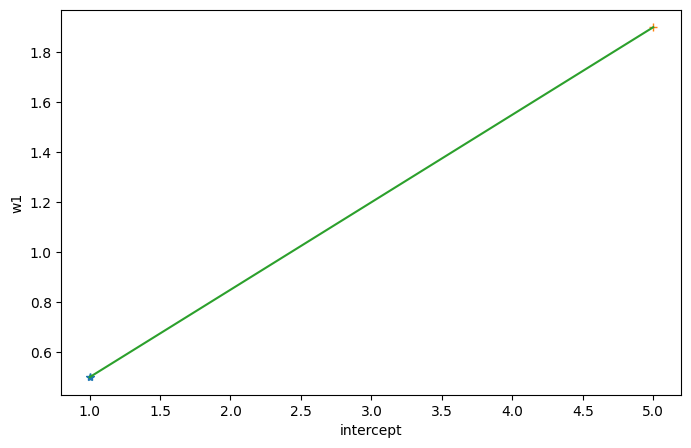

In [13]:
ax = plot_vectors(weights0, weights1)
ax.plot([weights0[0], weights1[0]], [weights0[1], weights1[1]]);

In [14]:
# a**2 + b**2 = c**2
((5-1)**2 + (1.9-0.5)**2)**0.5

4.237924020083418

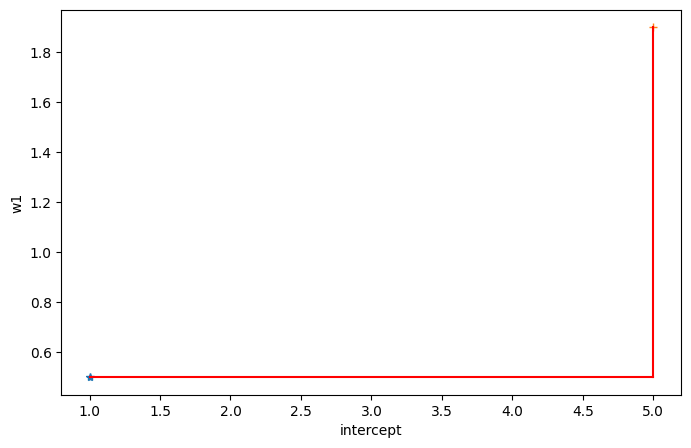

In [15]:
ax = plot_vectors(weights0, weights1)
ax.plot([weights0[0], weights1[0]], [weights0[1], weights0[1]], c='r')
ax.plot([weights1[0], weights1[0]], [weights0[1], weights1[1]], c='r');

In [16]:
np.linalg.norm(weights0 - weights1, ord=1)

5.4

In [17]:
abs(5-1) + abs(1.9-0.5)

5.4

In [18]:
n = X.shape[0]

eta = 1e-2 
epsilon = 1e-8
iter_num = 0

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
weight_dist = np.inf

while weight_dist > epsilon:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)

    W_new = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    weight_dist = np.linalg.norm(W_new - W, ord=2)
    W = W_new.copy()
    
    if iter_num % 10 == 0:
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,2)}')
    iter_num += 1

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9